In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv(r"UBER (1).csv")

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...,...
600,2021-09-27,46.770000,47.430000,46.189999,47.250000,47.250000,23034800
601,2021-09-28,46.700001,47.000000,45.759998,45.980000,45.980000,23707900
602,2021-09-29,46.000000,46.529999,44.299999,44.520000,44.520000,24599500
603,2021-09-30,44.709999,45.365002,43.860001,44.799999,44.799999,16650600


Data Engineering

In [8]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Statistics

In [9]:
pd.set_option("display.float","{:.2f}".format)

In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,605.00,605.00,605.00,605.00,605.00,605.00
mean,40.24,41.01,39.35,40.19,40.19,23574391.87
std,9.80,9.88,9.65,9.74,9.74,17270501.26
min,15.96,17.80,13.71,14.82,14.82,3380000.00
25%,32.37,33.02,31.45,32.47,32.47,13528200.00
50%,38.88,39.24,37.39,38.48,38.48,19223500.00
75%,48.49,49.62,47.75,48.41,48.41,28609600.00
max,63.25,64.05,60.80,63.18,63.18,186322500.00


1. Mean Opening Price:  $40.24
2. Mean closing Price:  $40.19
3. Mean high value:     $41.01
4. Mean low value:      $39.35
5. Mean valume Traded:  23574391.87

### Analysis for the year 2019
1. Open vs close 

2. high vs low

3. date vs valume

In [13]:
data_filtered = data[(data.Date >= "2019-01-01") & (data.Date <= "2019-12-31")]

In [14]:
print("Start Date : ",data_filtered.Date.min())
print("End Date   : ",data_filtered.Date.max())

Start Date :  2019-05-10
End Date   :  2019-12-31


### Statistics

In [15]:
data_filtered.describe()

,Open,High,Low,Close,Adj Close,Volume
count,163.00,163.00,163.00,163.00,163.00,163.00
mean,35.63,36.21,34.89,35.54,35.54,18798274.23
std,6.22,6.29,6.09,6.15,6.15,21775805.70
min,26.06,26.80,25.58,25.99,25.99,3380000.00
25%,30.17,30.47,29.53,30.13,30.13,7725550.00
50%,33.60,34.23,32.94,33.31,33.31,10434300.00
75%,42.33,43.15,41.26,42.31,42.31,23356900.00
max,46.98,47.08,45.08,46.38,46.38,186322500.00


### Inference:
1. Mean Opening Price : $35.63

2. Mean Closing Price : $35.54

3. Mean High value    : $36.21

4. Mean Low value     : $34.89

5. Mean valume Traded : 18798274.23 

In [16]:
print("Distribution Variance for Close vs Adj Close : {:.2f}".format(np.linalg.norm(data_filtered.Close - data_filtered["Adj Close"])))

Distribution Variance for Close vs Adj Close : 0.00


### Inference : 0 variance for the Close vs Adj Close shows that adjusted closing was equal to closing price all times or almost all times.

In [17]:
print("\n\nDistribution Variance for Open vs Close : {:.2f}".format(np.linalg.norm(data_filtered.Open - data_filtered.Close)))



Distribution Variance for Open vs Close : 10.66


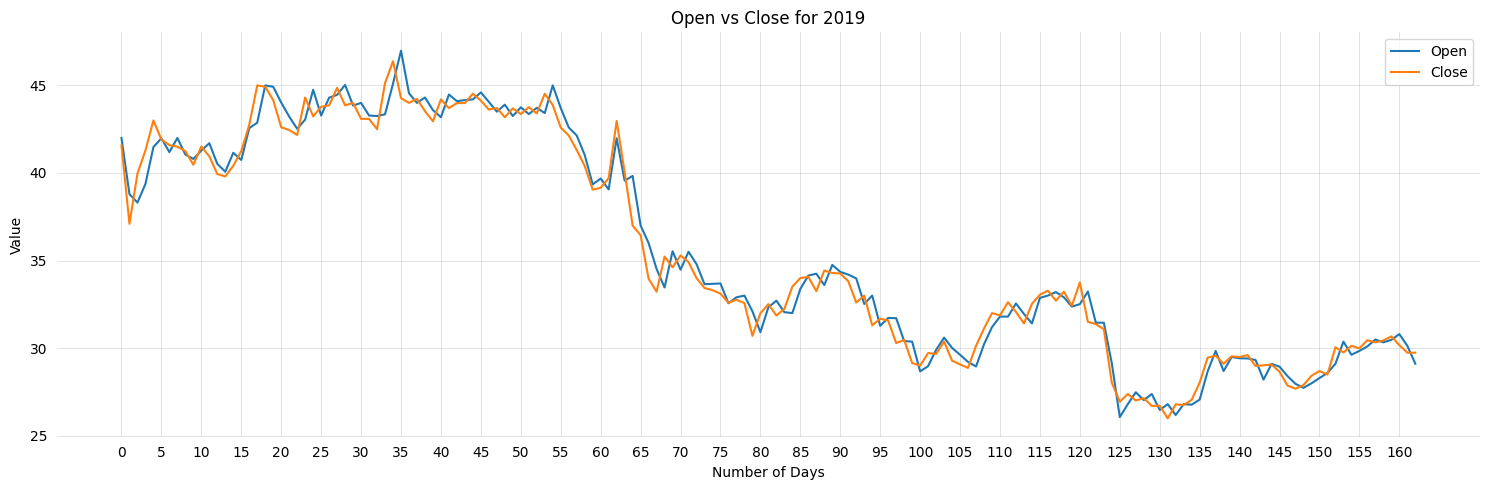

In [21]:
plt.rcParams["axes.linewidth"]="0"

plt.figure(figsize=(15,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Open,label="Open")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Close,label="Close")
plt.tick_params(bottom=False,left=False)
plt.title("Open vs Close for 2019")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.tight_layout()

In [22]:
print("Highest Opening Price Date : ",data_filtered[data_filtered.Open == data_filtered.Open.max()].Date.values[0])
print("Highest Closing Price Date : ",data_filtered[data_filtered.Close == data_filtered.Close.max()].Date.values[0])

print("Lowest Opening Price Date  : ",data_filtered[data_filtered.Open == data_filtered.Open.min()].Date.values[0])
print("Lowest Closing Price Date  : ",data_filtered[data_filtered.Close == data_filtered.Close.min()].Date.values[0])

Highest Opening Price Date :  2019-07-01
Highest Closing Price Date :  2019-06-28
Lowest Opening Price Date  :  2019-11-06
Lowest Closing Price Date  :  2019-11-14


Inference : A higher opening and closing price was observed on 34th and 35th trading day respectively. A relatively low opening price was observed on 125th trading day and a lowest closing price was observed on 132nd trading day . A smaller value of Distribution Variance (10.66) tells that Open and Close price are numerically close by on average during each trading day.



Distribution Variance for High vs Low   : 18.86


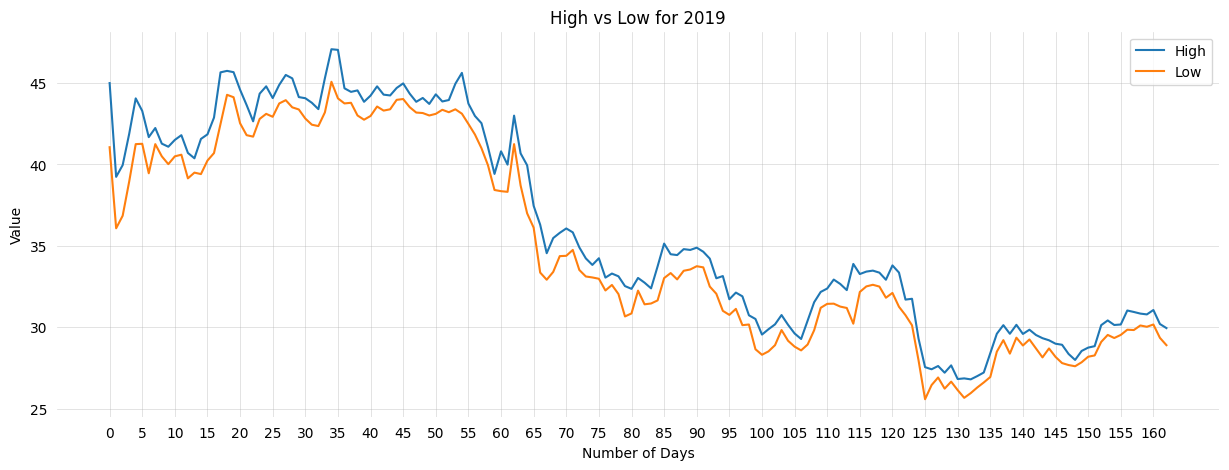

In [23]:
print("\n\nDistribution Variance for High vs Low   : {:.2f}".format(np.linalg.norm(data_filtered.High - data_filtered.Low)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(15,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.High,label="High")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Low,label="Low")
plt.tick_params(bottom=False,left=False)
plt.title("High vs Low for 2019")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [24]:
print("Peak High Price Date    : ",data_filtered[data_filtered.High == data_filtered.High.max()].Date.values[0])
print("Peak Low Price Date     : ",data_filtered[data_filtered.Low == data_filtered.Low.max()].Date.values[0])

print("Lowest High Price Date  : ",data_filtered[data_filtered.High == data_filtered.High.min()].Date.values[0])
print("Lowest Low Price Date   : ",data_filtered[data_filtered.Low == data_filtered.Low.min()].Date.values[0])

Peak High Price Date    :  2019-06-28
Peak Low Price Date     :  2019-06-28
Lowest High Price Date  :  2019-11-15
Lowest Low Price Date   :  2019-11-06


Inference : The peak of High and Low value was observed during 35th day and the lowest of High and Low value was observed during 130th and 125th trading days respectively. In addition to that, a large enough distribution variance of 18.86 shows there is a significance variance on average in the numerical values.

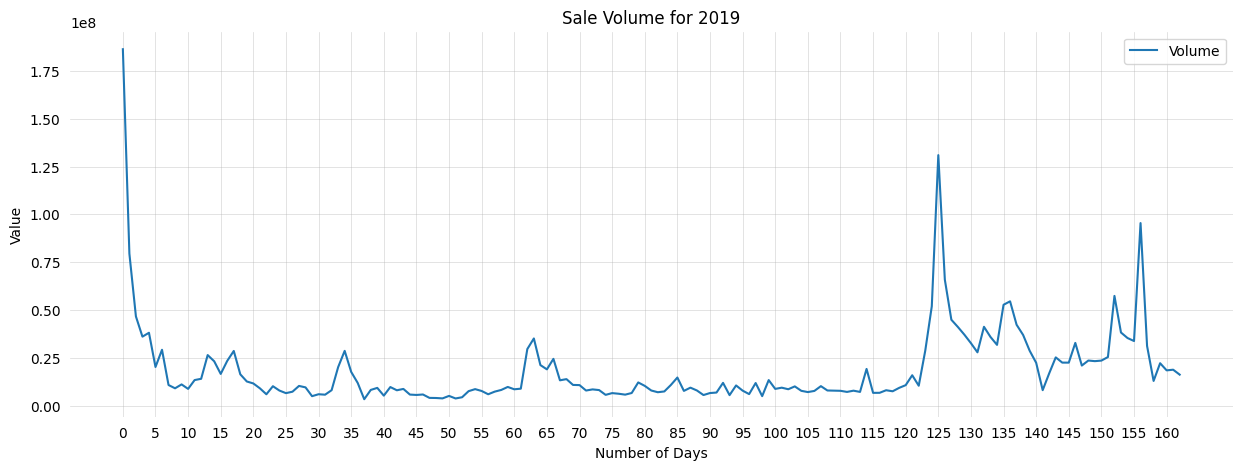

In [25]:
print("\n\n")
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(15,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Volume,label="Volume")
plt.tick_params(bottom=False,left=False)
plt.title("Sale Volume for 2019")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [26]:
print("Peak Volume Date   : ",data_filtered[data_filtered.Volume == data_filtered.Volume.max()].Date.values[0])
print("Lowest Volume Date : ",data_filtered[data_filtered.Volume == data_filtered.Volume.min()].Date.values[0])

Peak Volume Date   :  2019-05-10
Lowest Volume Date :  2019-07-03


Inference : The peak of trading volume was observed during the first trading day followed by a flooring of the volume until the next two peaks during 125th and 156th trading days respectively

### Analysis for the year 2020
Open vs Close
High vs Low
Date vs Volume

In [27]:
data_filtered = data[(data.Date >= "2020-01-01") & (data.Date <= "2020-12-31")]

In [28]:
print("Start Date : ",data_filtered.Date.min())
print("End Date   : ",data_filtered.Date.max())

Start Date :  2020-01-02
End Date   :  2020-12-31


### Statistics

In [29]:
data_filtered.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.00,253.00,253.00,253.00,253.00,253.00
mean,35.47,36.30,34.63,35.51,35.51,27679798.42
std,7.63,7.67,7.69,7.65,7.65,16383372.23
min,15.96,17.80,13.71,14.82,14.82,6316800.00
25%,31.01,31.70,30.47,31.08,31.08,16915800.00
50%,34.08,34.59,33.15,34.01,34.01,21947800.00
75%,37.30,37.90,36.72,37.14,37.14,33683500.00
max,54.59,56.02,53.65,54.86,54.86,112325800.00


In [30]:
print("Distribution Variance for Close vs Adj Close : {:.2f}".format(np.linalg.norm(data_filtered.Close - data_filtered["Adj Close"])))

Distribution Variance for Close vs Adj Close : 0.00


Inference : 0 variance for the Close vs Adj Close shows that adjusted closing was equal to closing price all times or almost all times.

Inference :
1. Mean Opening Price :   $35.47

2. Mean Closing Price :   $35.51

3. Mean High value    :   $36.30

4. Mean Low value     :   $34.63

5. Mean Volume Traded :   27679798.42




Distribution Variance for Open vs Close : 16.51


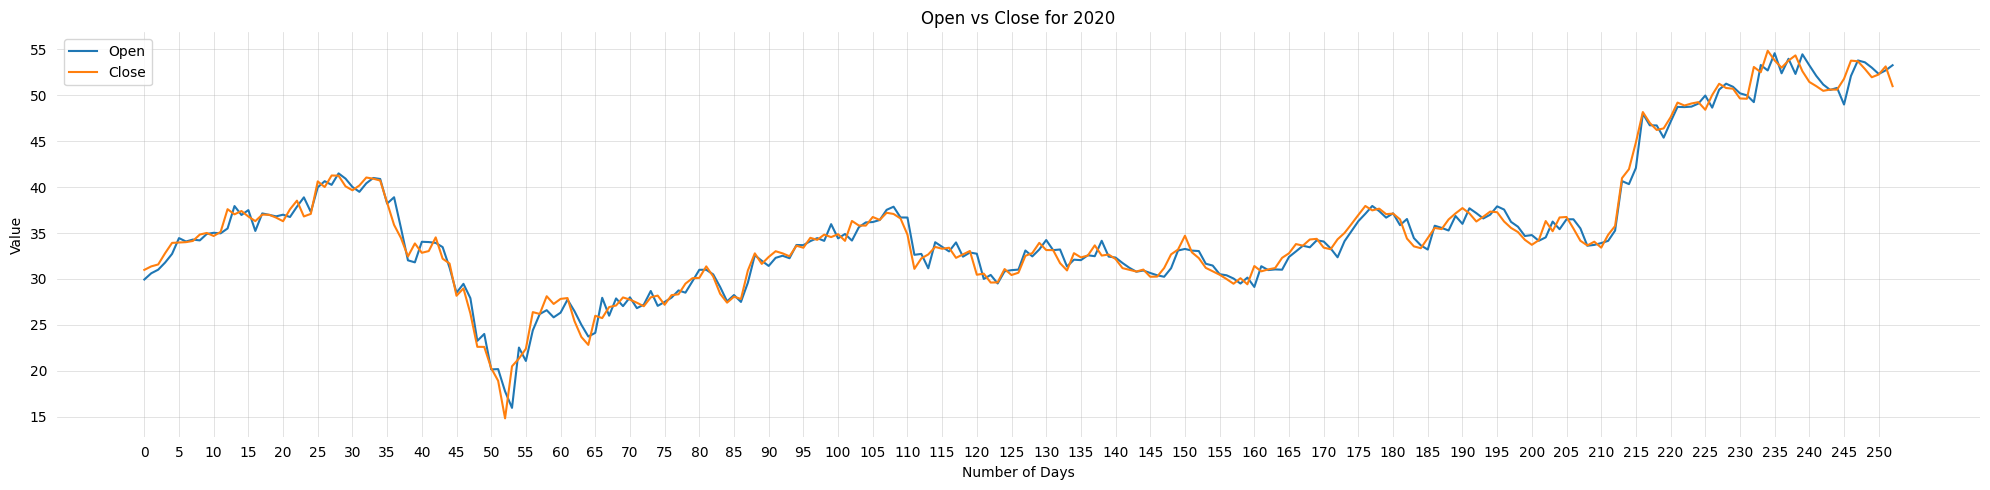

In [31]:
print("\n\nDistribution Variance for Open vs Close : {:.2f}".format(np.linalg.norm(data_filtered.Open - data_filtered.Close)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Open,label="Open")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Close,label="Close")
plt.tick_params(bottom=False,left=False)
plt.title("Open vs Close for 2020")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.tight_layout()


In [32]:
print("Highest Opening Price Date : ",data_filtered[data_filtered.Open == data_filtered.Open.max()].Date.values[0])
print("Highest Closing Price Date : ",data_filtered[data_filtered.Close == data_filtered.Close.max()].Date.values[0])

print("Lowest Opening Price Date  : ",data_filtered[data_filtered.Open == data_filtered.Open.min()].Date.values[0])
print("Lowest Closing Price Date  : ",data_filtered[data_filtered.Close == data_filtered.Close.min()].Date.values[0])

Highest Opening Price Date :  2020-12-07
Highest Closing Price Date :  2020-12-04
Lowest Opening Price Date  :  2020-03-19
Lowest Closing Price Date  :  2020-03-18


Inference : A higher opening and closing price was observed on 235th and 234th day respectively. A relatively low opening price was observed on 53th day and a lowest closing price was observed on 52nd day. A relatively higher value of Distribution Variance (16.51) with previous year tells that Open and Close price were numerically apart on average during each trading day pointing to the large change in stock prices throught the year.



Distribution Variance for High vs Low   : 29.37


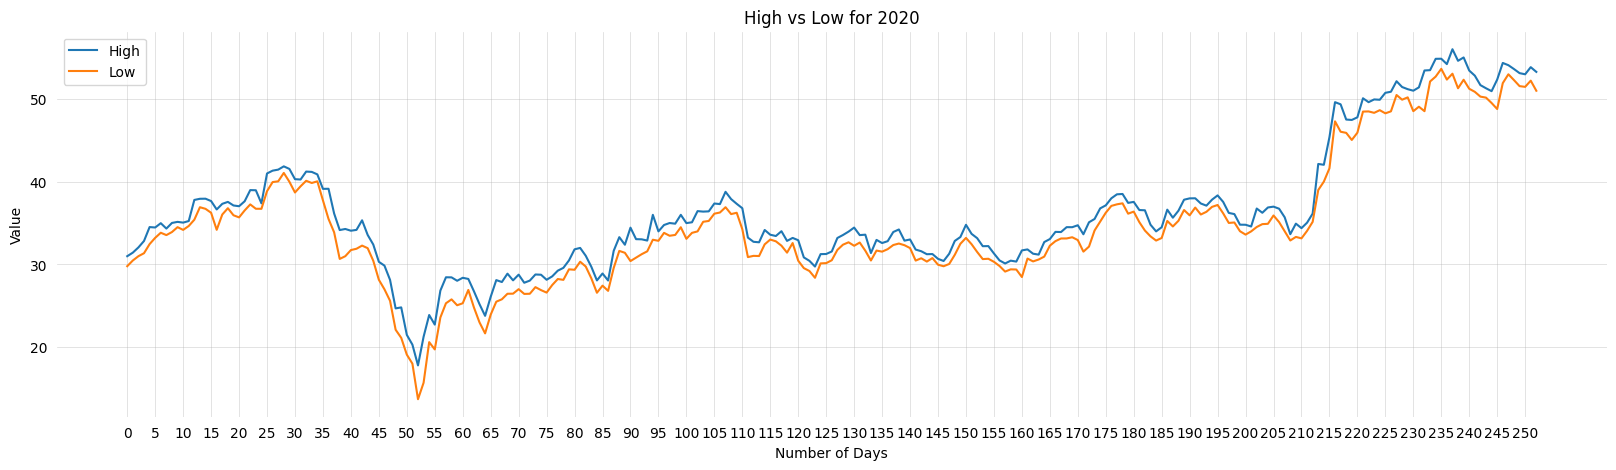

In [33]:
print("\n\nDistribution Variance for High vs Low   : {:.2f}".format(np.linalg.norm(data_filtered.High - data_filtered.Low)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.High,label="High")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Low,label="Low")
plt.tick_params(bottom=False,left=False)
plt.title("High vs Low for 2020")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [34]:
print("Peak High Price Date    : ",data_filtered[data_filtered.High == data_filtered.High.max()].Date.values[0])
print("Peak Low Price Date     : ",data_filtered[data_filtered.Low == data_filtered.Low.max()].Date.values[0])

print("Lowest High Price Date  : ",data_filtered[data_filtered.High == data_filtered.High.min()].Date.values[0])
print("Lowest Low Price Date   : ",data_filtered[data_filtered.Low == data_filtered.Low.min()].Date.values[0])

Peak High Price Date    :  2020-12-09
Peak Low Price Date     :  2020-12-07
Lowest High Price Date  :  2020-03-18
Lowest Low Price Date   :  2020-03-18


Inference : The peak of High and Low value was observed during 237th and 235th trading day respectively. The lowest of High and Low value was observed during 52ndtrading day. In addition to that, a relatively large enough distribution variance of 29.37 shows there is a significance variance on average in the numerical values.

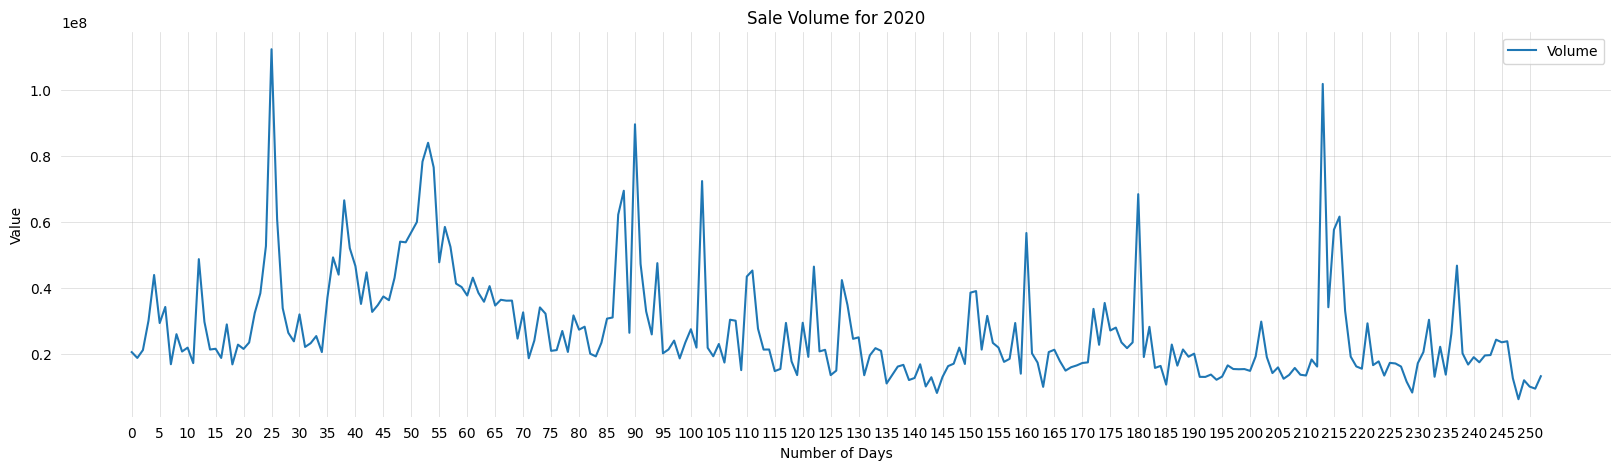

In [35]:
print("\n\n")
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Volume,label="Volume")
plt.tick_params(bottom=False,left=False)
plt.title("Sale Volume for 2020")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [36]:
print("Peak Volume Date   : ",data_filtered[data_filtered.Volume == data_filtered.Volume.max()].Date.values[0])
print("Lowest Volume Date : ",data_filtered[data_filtered.Volume == data_filtered.Volume.min()].Date.values[0])

Peak Volume Date   :  2020-02-07
Lowest Volume Date :  2020-12-24


Inference : The peak of trading volume was observed during the 25th trading day followed by another of the volume during 212th trading day respectively. The lowest volume traded was recorded on 249th trading day.

### Analysis for the year 2021

Open vs Close

High vs Low

Date vs Volume

In [37]:
data_filtered = data[(data.Date >= "2021-01-01") & (data.Date <= "2021-12-31")]

In [38]:
print("Start Date : ",data_filtered.Date.min())
print("End Date   : ",data_filtered.Date.max())

Start Date :  2021-01-04
End Date   :  2021-10-01


### Statistics

In [39]:
data_filtered.describe()

,Open,High,Low,Close,Adj Close,Volume
count,189.00,189.00,189.00,189.00,189.00,189.00
mean,50.60,51.46,49.52,50.46,50.46,22197880.33
std,6.33,6.39,6.07,6.25,6.25,12062792.83
min,38.30,39.00,38.08,38.48,38.48,8361600.00
25%,45.88,46.79,44.85,45.98,45.98,14926500.00
50%,50.67,51.49,49.71,50.76,50.76,18822300.00
75%,55.75,57.18,54.81,55.69,55.69,26232800.00
max,63.25,64.05,60.80,63.18,63.18,106631700.00


In [40]:
print("Distribution Variance for Close vs Adj Close : {:.2f}".format(np.linalg.norm(data_filtered.Close - data_filtered["Adj Close"])))

Distribution Variance for Close vs Adj Close : 0.00


### Inference : 0 variance for the Close vs Adj Close shows that adjusted closing was equal to closing price all times or almost all times.

Inference :

Mean Opening Price :   $50.60
    
Mean Closing Price :   $50.46
    
Mean High value    :   $51.46
    
Mean Low value     :   $49.52
    
Mean Volume Traded :   22197880.33



Distribution Variance for Open vs Close : 16.80


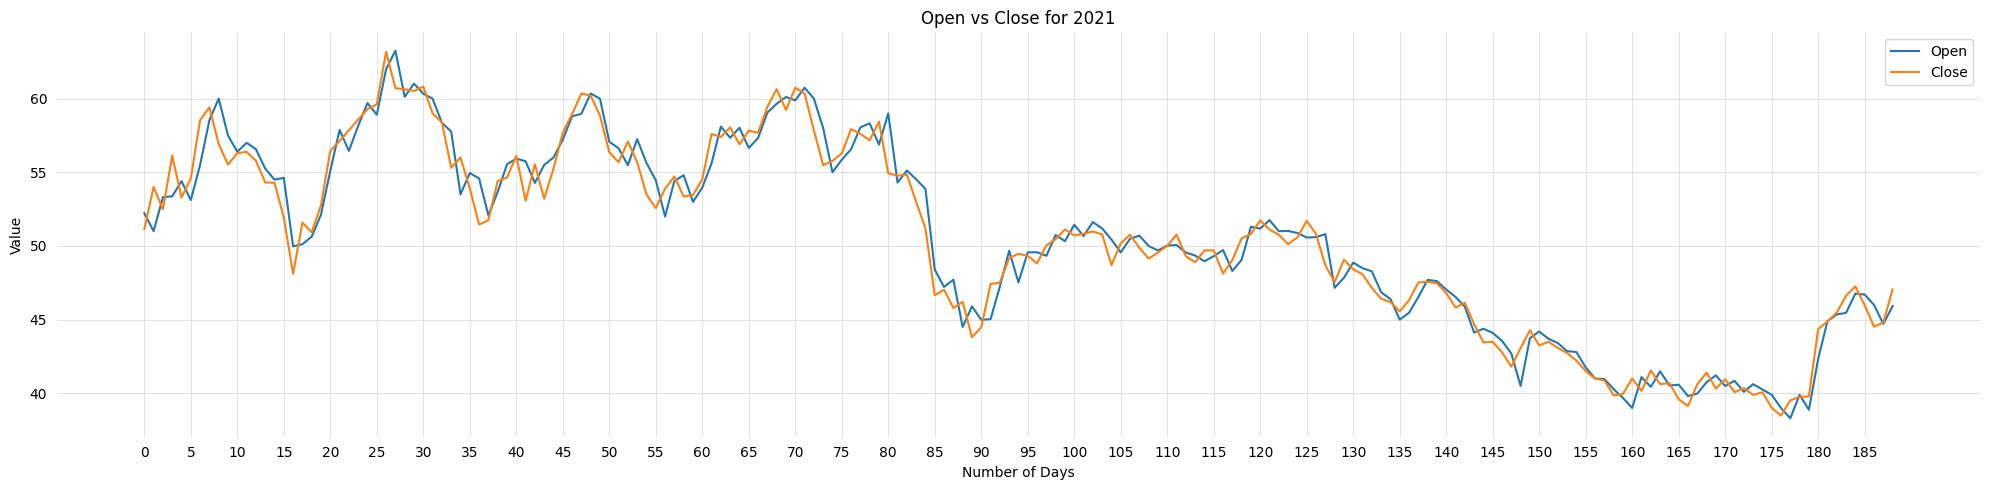

In [41]:
print("\n\nDistribution Variance for Open vs Close : {:.2f}".format(np.linalg.norm(data_filtered.Open - data_filtered.Close)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Open,label="Open")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Close,label="Close")
plt.tick_params(bottom=False,left=False)
plt.title("Open vs Close for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.tight_layout()

In [42]:
print("Highest Opening Price Date : ",data_filtered[data_filtered.Open == data_filtered.Open.max()].Date.values[0])
print("Highest Closing Price Date : ",data_filtered[data_filtered.Close == data_filtered.Close.max()].Date.values[0])

print("Lowest Opening Price Date  : ",data_filtered[data_filtered.Open == data_filtered.Open.min()].Date.values[0])
print("Lowest Closing Price Date  : ",data_filtered[data_filtered.Close == data_filtered.Close.min()].Date.values[0])

Highest Opening Price Date :  2021-02-11
Highest Closing Price Date :  2021-02-10
Lowest Opening Price Date  :  2021-09-16
Lowest Closing Price Date  :  2021-09-15


Inference : A higher opening and closing price was observed on 26th and 26th trading day respectively. A relatively low opening price was observed on 177th trading day and a lowest closing price was observed on 176th trading day. A relatively higher value of Distribution Variance (16.80) tells that Open and Close price were numerically apart on average during each trading day pointing to the large change in stock prices throught the year.



Distribution Variance for High vs Low   : 29.56


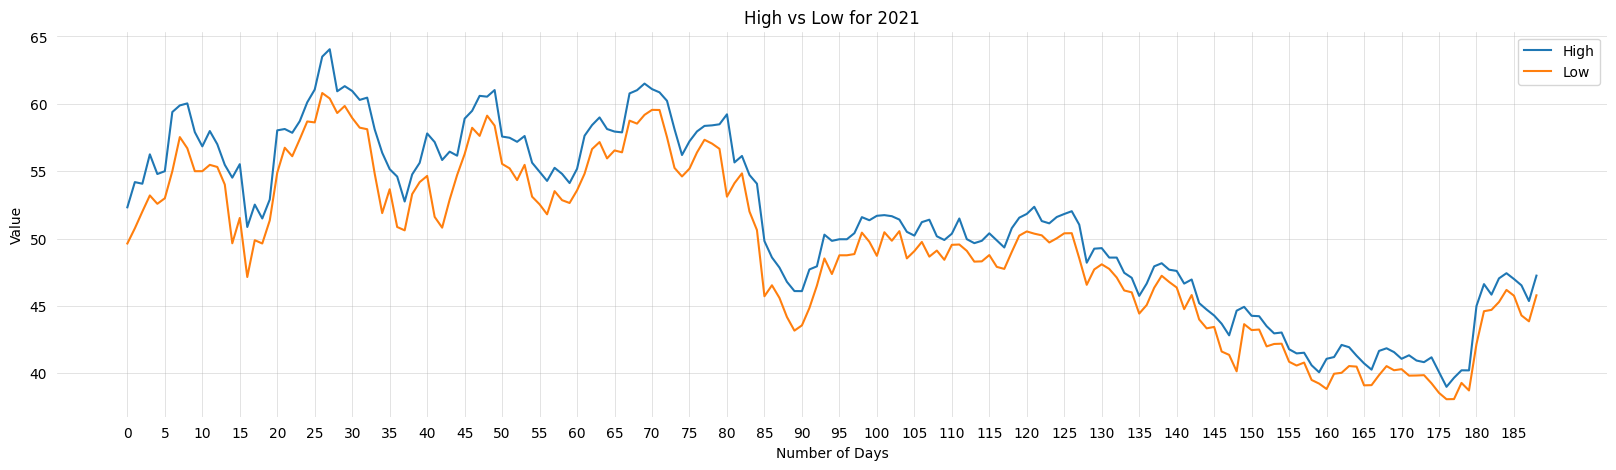

In [43]:
print("\n\nDistribution Variance for High vs Low   : {:.2f}".format(np.linalg.norm(data_filtered.High - data_filtered.Low)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.High,label="High")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Low,label="Low")
plt.tick_params(bottom=False,left=False)
plt.title("High vs Low for 2021")
plt.xlabel("Number of Days")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [44]:
print("Peak High Price Date    : ",data_filtered[data_filtered.High == data_filtered.High.max()].Date.values[0])
print("Peak Low Price Date     : ",data_filtered[data_filtered.Low == data_filtered.Low.max()].Date.values[0])

print("Lowest High Price Date  : ",data_filtered[data_filtered.High == data_filtered.High.min()].Date.values[0])
print("Lowest Low Price Date   : ",data_filtered[data_filtered.Low == data_filtered.Low.min()].Date.values[0])

Peak High Price Date    :  2021-02-11
Peak Low Price Date     :  2021-02-10
Lowest High Price Date  :  2021-09-15
Lowest Low Price Date   :  2021-09-15


Inference : The peak of High and Low value was observed during 27th and 26th trading day respectively. The lowest of High and Low value was observed during 175th and 176th trading day. In addition to that, a relatively large enough distribution variance of 29.56 shows there is a significance variance on average in the numerical values.

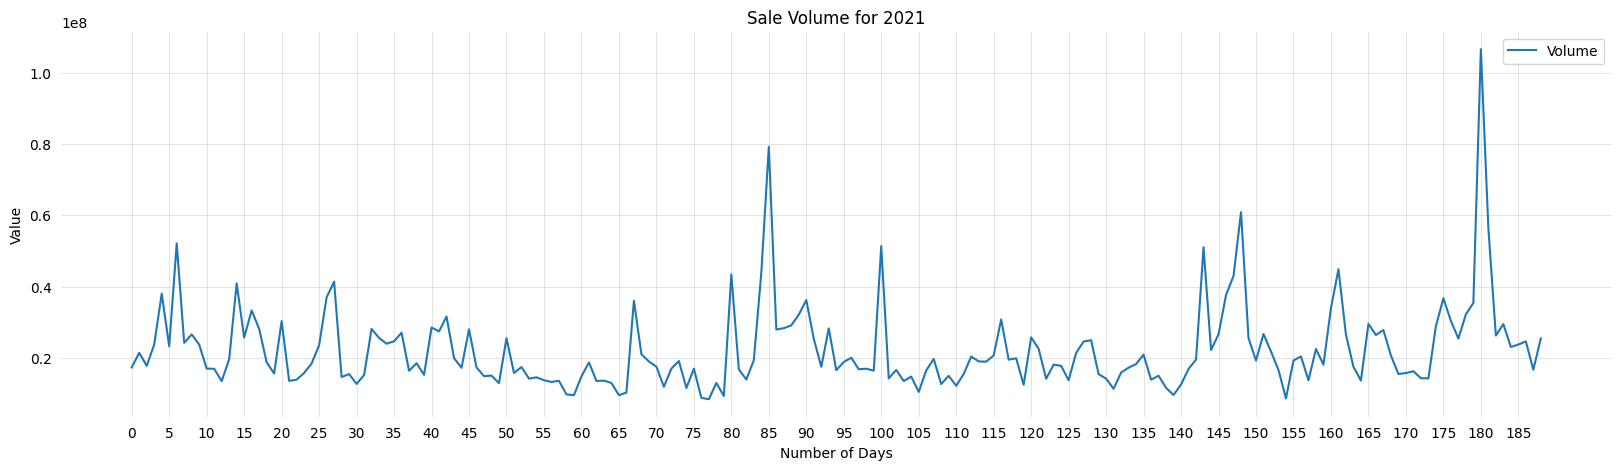

In [45]:
print("\n\n")
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Volume,label="Volume")
plt.tick_params(bottom=False,left=False)
plt.title("Sale Volume for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [46]:
print("Peak Volume Date   : ",data_filtered[data_filtered.Volume == data_filtered.Volume.max()].Date.values[0])
print("Lowest Volume Date : ",data_filtered[data_filtered.Volume == data_filtered.Volume.min()].Date.values[0])

Peak Volume Date   :  2021-09-21
Lowest Volume Date :  2021-04-26


Inference : The peak of trading volume was observed during the 180th trading day followed by another of the volume during 85th trading day respectively. The lowest volume traded was recorded on 77th trading day.